In [1]:
#Εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time

In [2]:
import matplotlib as mpl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import numpy as np
import matplotlib
from matplotlib.collections import LineCollection
import datetime
import re  
import string
from collections import Counter
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [5]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.1.0)


In [6]:
from wordcloud import WordCloud, STOPWORDS
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [7]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Η εξόρυξη των παρακάτω δεδομένων έγινε μέσω της βιβλιοθήκης beautifulsοup από την ιστοσελίδα news247. Από τη συγκεκριμένη σελίδα, στην αναζήτηση της βάλαμε την λέξη κλειδί 'εμβόλιο' καθώς θέλαμε όλα τα άρθρα σχετικά με αυτό το θέμα. Συνολικά, καταφέραμε να πάρουμε 700 άρθρα από το διάστημα 04/20 - 7/21 με τις εξής πληροφορίες των άρθρων: Ημερομηνία, κατηγορία άρθρου, συντάκτης του άρθρου, το βασικό κείμενο, το url αλλά και των τίτλο του.

In [8]:
vaccine =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/news247_final.tsv", sep='\t')
vaccine

,Unnamed: 0,title,date,body,category,author,url
0,0,Νοσοκομειακοί γιατροί για εμβολιασμούς κυβερνη...,2020-12-30 17:01,['Την οργισμένη αντίδραση της ΟΕΝΓΕ (Ομοσπονδί...,['\r\n ΥΓΕΙΑ'],NO author,https://www.news247.gr/ygeia/nosokomeiakoi-gia...
1,1,Ρόδος: Εμβολιάστηκε ο τελευταίος επιζών Δωδεκα...,2021-01-29 11:35,['Ο τελευταίος επιζών Δωδεκανήσιος Ιερολοχίτης...,['\r\n ΚΟΙΝΩΝΙΑ'],NO author,https://www.news247.gr/koinonia/rodos-emvolias...
2,2,Κορονοϊός: Φόβοι για νέα μετάλλαξη από τον συγ...,2021-01-19 20:08,"['Ένα ακόμα ""καμπανάκι κινδύνου"" χτυπούν οι επ...",['\r\n ΥΓΕΙΑ'],\r\n Ανθή Κουτσουμπού,https://www.news247.gr/ygeia/koronoios-fovoi-g...
3,3,Κορονοϊός: Τα εμβόλια ενδέχεται να μην συνιστώ...,2020-10-14 22:44,['Τα Κέντρα Ελέγχου και Πρόληψης Νοσημάτων (CD...,['\r\n ΚΟΣΜΟΣ'],NO author,https://www.news247.gr/kosmos/koronoios-ta-emv...
4,4,Βραζιλία: Εγκρίθηκαν δοκιμές σε ανθρώπους του ...,2020-08-18 16:16,['Η ρυθμιστική υγειονομική αρχή της Βραζιλίας ...,['\r\n ΚΟΣΜΟΣ'],NO author,https://www.news247.gr/kosmos/vrazilia-egkrith...
...,...,...,...,...,...,...,...
695,695,Κορονοϊός: Το φάρμακο ρεμδεσιβίρη αποδείχθηκε ...,2020-04-23 22:57,['Το αντιιικό φάρμακο ρεμδεσιβίρη της αμερικαν...,['\r\n ΚΟΣΜΟΣ'],NO author,https://www.news247.gr/kosmos/koronoios-to-far...
696,696,Η απάντηση του Πρύτανη του ΑΠΘ για τον εμβολια...,2021-03-13 16:43,['Δήλωση- απάντηση σε δημοσίευμα το οποίο -όπω...,['\r\n ΚΟΙΝΩΝΙΑ'],NO author,https://www.news247.gr/koinonia/i-apantisi-toy...
697,697,Κίνα: Εμβολιασμένη εργαζόμενη σε νοσοκομείο το...,2021-03-20 10:19,['Μια εργαζόμενη σε νοσοκομείο που είχε λάβει ...,['\r\n ΚΟΣΜΟΣ'],NO author,https://www.news247.gr/kosmos/kina-emvoliasmen...
698,698,Εμβόλιο CoronaVac: Αποτελεσματικότητα 50% με 9...,2020-12-25 16:38,['Το εμβόλιο CoronaVac κατά της πανδημίας COVI...,['\r\n ΥΓΕΙΑ'],NO author,https://www.news247.gr/ygeia/emvolio-coronavac...


In [9]:
vaccine = vaccine.drop(columns=['Unnamed: 0'])


In [10]:
vaccine.dtypes

title       object
date        object
body        object
category    object
author      object
url         object
dtype: object

In [11]:
# Καθάρισμα δεδομένων από NaN values

vaccine.isnull().sum()
missing_values = ["n/a", "na", "NaN", "--", 999, 9999]   
vaccine.replace(to_replace = missing_values, value = np.nan, inplace = True)
vaccine.dropna(inplace=True) 
vaccine.head()
vaccine.shape

(700, 6)

In [12]:
# Καθαρισμός της στήλης 'category'
X1 = vaccine["category"]

processed_tweets = []
 
for tweet in range(0, len(X1)):  
    # Remove all special characters
    processed_tweet = re.sub(r'\W', ' ', str(X1[tweet]))
    # Append the changes in a list
    processed_tweets.append(processed_tweet)
    
df3 = pd.DataFrame(processed_tweets)
df3.rename(columns = {0:'category'}, inplace = True)
df3['category'] = df3['category'].astype('str')
df3['category'] = df3.replace('r n ',  '', regex=True)
df3.head(10)

,category
0,ΥΓΕΙΑ
1,ΚΟΙΝΩΝΙΑ
2,ΥΓΕΙΑ
3,ΚΟΣΜΟΣ
4,ΚΟΣΜΟΣ
5,NEW ARTICLES
6,ΥΓΕΙΑ
7,ΥΓΕΙΑ
8,ΠΟΛΙΤΙΚΗ
9,ΚΟΣΜΟΣ


In [13]:
# Καθαρισμός της στήλης'body'
X1 = vaccine["body"]

processed_tweets = []
 
for tweet in range(0, len(X1)):  
    # Remove all special characters
    processed_tweet = re.sub(r'\W', ' ', str(X1[tweet]))
    # Append the changes in a list
    processed_tweets.append(processed_tweet)

df1 = pd.DataFrame(processed_tweets)
df1.rename(columns = {0:'body'}, inplace = True)
df1.head(10)

,body
0,Την οργισμένη αντίδραση της ΟΕΝΓΕ Ομοσπονδί...
1,Ο τελευταίος επιζών Δωδεκανήσιος Ιερολοχίτης...
2,Ένα ακόμα καμπανάκι κινδύνου χτυπούν οι επ...
3,Τα Κέντρα Ελέγχου και Πρόληψης Νοσημάτων CD...
4,Η ρυθμιστική υγειονομική αρχή της Βραζιλίας ...
5,Δεν έχουν περάσει πολλές ημέρες από την ομιλ...
6,Οι 5 εβδομάδες lockdown με τα συγκεκριμένα π...
7,Η βιασύνη να εμβολιαστούν οι πληθυσμοί κατά ...
8,Στην κυβέρνηση επικρατεί μεν συγκρατημένη αι...
9,Νέα τεχνολογικά δεδομένα στην πρόληψη του κο...


In [14]:
# Καθαρισμός της στήλης 'author'
X1 = vaccine["author"]

processed_tweets = []
 
for tweet in range(0, len(X1)):  
    # Remove all special characters
    processed_tweet = re.sub(r'\W', ' ', str(X1[tweet]))
    # Removing prefixed '\r\n '
    processed_tweet = re.sub(r'^\r\n \s+', '', processed_tweet)
    # Append the changes in a list
    processed_tweets.append(processed_tweet)
    
df2 = pd.DataFrame(processed_tweets)
df2.rename(columns = {0:'author'}, inplace = True)
df2.head(10)

,author
0,NO author
1,NO author
2,Ανθή Κουτσουμπού
3,NO author
4,NO author
5,NO author
6,NO author
7,Ανθή Κουτσουμπού
8,Βίκυ Σαμαρά
9,NO author


In [15]:
# Μετά απο το καθάρισμα τα ενώνω όλα μαζί
vaccine_new = vaccine[['title', 'date', 'url']]
vaccine_new = pd.concat([vaccine_new, df1, df2, df3], axis=1)
vaccine_new = vaccine_new.reindex(columns=['title','date','body','category','author','url'])
vaccine_new.head(5)

,title,date,body,category,author,url
0,Νοσοκομειακοί γιατροί για εμβολιασμούς κυβερνη...,2020-12-30 17:01,Την οργισμένη αντίδραση της ΟΕΝΓΕ Ομοσπονδί...,ΥΓΕΙΑ,NO author,https://www.news247.gr/ygeia/nosokomeiakoi-gia...
1,Ρόδος: Εμβολιάστηκε ο τελευταίος επιζών Δωδεκα...,2021-01-29 11:35,Ο τελευταίος επιζών Δωδεκανήσιος Ιερολοχίτης...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/rodos-emvolias...
2,Κορονοϊός: Φόβοι για νέα μετάλλαξη από τον συγ...,2021-01-19 20:08,Ένα ακόμα καμπανάκι κινδύνου χτυπούν οι επ...,ΥΓΕΙΑ,Ανθή Κουτσουμπού,https://www.news247.gr/ygeia/koronoios-fovoi-g...
3,Κορονοϊός: Τα εμβόλια ενδέχεται να μην συνιστώ...,2020-10-14 22:44,Τα Κέντρα Ελέγχου και Πρόληψης Νοσημάτων CD...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/koronoios-ta-emv...
4,Βραζιλία: Εγκρίθηκαν δοκιμές σε ανθρώπους του ...,2020-08-18 16:16,Η ρυθμιστική υγειονομική αρχή της Βραζιλίας ...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/vrazilia-egkrith...


In [16]:
vaccine_new.shape

(700, 6)

In [17]:
#Μετατρέπουμε τη στήλη Date απο object σε ημερομηνία
from datetime import timedelta
from datetime import datetime as dt

vaccine_new['date'] = pd.to_datetime(vaccine_new['date'], errors='coerce')
vaccine_new

,title,date,body,category,author,url
0,Νοσοκομειακοί γιατροί για εμβολιασμούς κυβερνη...,2020-12-30 17:01:00,Την οργισμένη αντίδραση της ΟΕΝΓΕ Ομοσπονδί...,ΥΓΕΙΑ,NO author,https://www.news247.gr/ygeia/nosokomeiakoi-gia...
1,Ρόδος: Εμβολιάστηκε ο τελευταίος επιζών Δωδεκα...,2021-01-29 11:35:00,Ο τελευταίος επιζών Δωδεκανήσιος Ιερολοχίτης...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/rodos-emvolias...
2,Κορονοϊός: Φόβοι για νέα μετάλλαξη από τον συγ...,2021-01-19 20:08:00,Ένα ακόμα καμπανάκι κινδύνου χτυπούν οι επ...,ΥΓΕΙΑ,Ανθή Κουτσουμπού,https://www.news247.gr/ygeia/koronoios-fovoi-g...
3,Κορονοϊός: Τα εμβόλια ενδέχεται να μην συνιστώ...,2020-10-14 22:44:00,Τα Κέντρα Ελέγχου και Πρόληψης Νοσημάτων CD...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/koronoios-ta-emv...
4,Βραζιλία: Εγκρίθηκαν δοκιμές σε ανθρώπους του ...,2020-08-18 16:16:00,Η ρυθμιστική υγειονομική αρχή της Βραζιλίας ...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/vrazilia-egkrith...
...,...,...,...,...,...,...
695,Κορονοϊός: Το φάρμακο ρεμδεσιβίρη αποδείχθηκε ...,2020-04-23 22:57:00,Το αντιιικό φάρμακο ρεμδεσιβίρη της αμερικαν...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/koronoios-to-far...
696,Η απάντηση του Πρύτανη του ΑΠΘ για τον εμβολια...,2021-03-13 16:43:00,Δήλωση απάντηση σε δημοσίευμα το οποίο όπω...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/i-apantisi-toy...
697,Κίνα: Εμβολιασμένη εργαζόμενη σε νοσοκομείο το...,2021-03-20 10:19:00,Μια εργαζόμενη σε νοσοκομείο που είχε λάβει ...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/kina-emvoliasmen...
698,Εμβόλιο CoronaVac: Αποτελεσματικότητα 50% με 9...,2020-12-25 16:38:00,Το εμβόλιο CoronaVac κατά της πανδημίας COVI...,ΥΓΕΙΑ,NO author,https://www.news247.gr/ygeia/emvolio-coronavac...


In [18]:
#Σπάμε την στήλη ημερομηνία σε τρείς νέες στήλες (year, month, day)
vaccine_new['year'] = pd.DatetimeIndex(vaccine_new['date']).year
vaccine_new['month'] = pd.DatetimeIndex(vaccine_new['date']).month
vaccine_new['day'] = pd.DatetimeIndex(vaccine_new['date']).day
vaccine_new

,title,date,body,category,author,url,year,month,day
0,Νοσοκομειακοί γιατροί για εμβολιασμούς κυβερνη...,2020-12-30 17:01:00,Την οργισμένη αντίδραση της ΟΕΝΓΕ Ομοσπονδί...,ΥΓΕΙΑ,NO author,https://www.news247.gr/ygeia/nosokomeiakoi-gia...,2020,12,30
1,Ρόδος: Εμβολιάστηκε ο τελευταίος επιζών Δωδεκα...,2021-01-29 11:35:00,Ο τελευταίος επιζών Δωδεκανήσιος Ιερολοχίτης...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/rodos-emvolias...,2021,1,29
2,Κορονοϊός: Φόβοι για νέα μετάλλαξη από τον συγ...,2021-01-19 20:08:00,Ένα ακόμα καμπανάκι κινδύνου χτυπούν οι επ...,ΥΓΕΙΑ,Ανθή Κουτσουμπού,https://www.news247.gr/ygeia/koronoios-fovoi-g...,2021,1,19
3,Κορονοϊός: Τα εμβόλια ενδέχεται να μην συνιστώ...,2020-10-14 22:44:00,Τα Κέντρα Ελέγχου και Πρόληψης Νοσημάτων CD...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/koronoios-ta-emv...,2020,10,14
4,Βραζιλία: Εγκρίθηκαν δοκιμές σε ανθρώπους του ...,2020-08-18 16:16:00,Η ρυθμιστική υγειονομική αρχή της Βραζιλίας ...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/vrazilia-egkrith...,2020,8,18
...,...,...,...,...,...,...,...,...,...
695,Κορονοϊός: Το φάρμακο ρεμδεσιβίρη αποδείχθηκε ...,2020-04-23 22:57:00,Το αντιιικό φάρμακο ρεμδεσιβίρη της αμερικαν...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/koronoios-to-far...,2020,4,23
696,Η απάντηση του Πρύτανη του ΑΠΘ για τον εμβολια...,2021-03-13 16:43:00,Δήλωση απάντηση σε δημοσίευμα το οποίο όπω...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/i-apantisi-toy...,2021,3,13
697,Κίνα: Εμβολιασμένη εργαζόμενη σε νοσοκομείο το...,2021-03-20 10:19:00,Μια εργαζόμενη σε νοσοκομείο που είχε λάβει ...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/kina-emvoliasmen...,2021,3,20
698,Εμβόλιο CoronaVac: Αποτελεσματικότητα 50% με 9...,2020-12-25 16:38:00,Το εμβόλιο CoronaVac κατά της πανδημίας COVI...,ΥΓΕΙΑ,NO author,https://www.news247.gr/ygeia/emvolio-coronavac...,2020,12,25


In [19]:
#Tα 10 πιο πρόσφατα άρθρα
vaccine_new.sort_values(by="date", ascending= False).head(10)


,title,date,body,category,author,url,year,month,day
476,Κρήτη: Θερμοπληξία και εξάντληση τα αίτια του ...,2021-07-04 12:55:00,Σε θερμοπληξία και εξάντληση οφείλεται τελικ...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/kriti-thermopl...,2021,7,4
222,Ηχηρή προειδοποίηση ειδικών: 'Εργοστάσια μεταλ...,2021-07-03 19:11:00,Με την μετάλλαξη Δέλτα να έχει ήδη κάνει αισ...,ΥΓΕΙΑ,Ανθή Κουτσουμπού,https://www.news247.gr/ygeia/ichiri-proeidopoi...,2021,7,3
171,Κύπρος: Επίδομα διακοπών στους εμβολιασμένους ...,2021-07-03 12:25:00,Τις αποφάσεις του υπουργικού συμβουλίου για ...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/kypros-epidoma-d...,2021,7,3
305,Εμβόλιο κορονοϊού mRNA: Η απουσία ήπιων παρενε...,2021-07-03 11:16:00,Η εκδήλωση ήπιων παρενεργειών μετά από ένα m...,ΥΓΕΙΑ,NO author,https://www.news247.gr/ygeia/emvolio-koronoioy...,2021,7,3
398,Είναι ν΄απορείς… - Γνώμες | News 24/7,2021-07-03 09:32:00,1 Εμβολιασμοί Salus populi suprema lex esto...,ΓΝΩΜΕΣ,Γιάννης Τριάντης,https://www.news247.gr/gnomes/giannhs-trianths...,2021,7,3
202,Μετακινήσεις σε νησιά: Με μοριακό ή rapid test...,2021-07-02 17:26:00,Στα νέα μέτρα που ανακοίνωσε ο Νίκος Χαρδαλι...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/metakiniseis-s...,2021,7,2
440,Οι αρχές της ΕΕ έχουν αποφανθεί: Ναι στο πιστο...,2021-07-02 12:13:00,Εσχάτως γίνεται πολύ λόγος για το αν οι εμβο...,ΚΟΙΝΩΝΙΑ,Νίκος Γιαννόπουλος,https://www.news247.gr/koinonia/oi-arches-ee-e...,2021,7,2
129,Κουτσόπουλος για εστίαση: 'Χρειάζονται κίνητρα...,2021-07-02 10:15:00,Για τις πρωτόγνωρες συνθήκες που θα εφαρμοστ...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/koytsopoylos-g...,2021,7,2
403,Κορονοϊός: Όλο και πιο κοντά το 4ο κύμα - Αυξη...,2021-07-02 06:19:00,Ανησυχία στις υγειονομικές αρχές έχει προκαλ...,ΥΓΕΙΑ,Γιώργος Σακκάς,https://www.news247.gr/ygeia/koronoios-olo-kai...,2021,7,2
187,ΣΥΡΙΖΑ: Ο κ. Μητσοτάκης έχει αποφασίσει να διχ...,2021-07-01 14:12:00,Μέσα στον πανικό της για το μπάχαλο που έχε...,ΠΟΛΙΤΙΚΗ,NO author,https://www.news247.gr/politiki/syriza-o-k-mit...,2021,7,1


In [20]:
#Tα 10 πιο παλιά άρθρα
vaccine_new.sort_values(by="date", ascending= True).head(10)

,title,date,body,category,author,url,year,month,day
431,Εμβόλιο: Ο άνθρωπος που έγινε δύο φορές εθελον...,2020-04-05 11:16:00,Ο 31χρονος σπουδαστής ιατρικής Sean Doyle εί...,ΚΟΣΜΟΣ,Χρήστος Δεμέτης,https://www.news247.gr/kosmos/emvolio-o-anthro...,2020,4,5
230,Κορονοϊός: Το Παστέρ δίνει απαντήσεις σε 23 ερ...,2020-04-08 13:53:00,Το Ελληνικό Ινστιτούτο Παστέρ ενημερώνει το ...,ΥΓΕΙΑ,NO author,https://www.news247.gr/ygeia/koronoios-to-past...,2020,4,8
389,Κορονοϊός: Ερευνάται στην Ελλάδα θεραπεία από ...,2020-04-14 06:05:00,Στο αίμα ασθενών που ανάρρωσαν από κορονοϊό ...,ΚΟΙΝΩΝΙΑ,Γιώργος Σακκάς,https://www.news247.gr/koinonia/koronoios-erey...,2020,4,14
511,Κορονοϊός - Βρετανία: Σύσταση ειδικής ομάδας γ...,2020-04-17 21:32:00,Τη σύσταση ειδικής επιστημονικής ομάδας για ...,GOOD NEWS,NO author,https://www.news247.gr/good-news/koronoios-vre...,2020,4,17
413,Άρση περιοριστικών μέτρων: Τέλος Απριλίου θα δ...,2020-04-18 14:17:00,Στα τέλη Απριλίου θα γίνει η αξιολόγηση της ...,ΚΟΙΝΩΝΙΑ,NO author,https://www.news247.gr/koinonia/theodorikakos-...,2020,4,18
247,Γερμανία: Εναρξη κλινικών δοκιμών για υποψήφιο...,2020-04-22 13:19:00,Το Ινστιτούτο διευκρινίζει ότι πρόκειται για...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/germania-enarxi-...,2020,4,22
695,Κορονοϊός: Το φάρμακο ρεμδεσιβίρη αποδείχθηκε ...,2020-04-23 22:57:00,Το αντιιικό φάρμακο ρεμδεσιβίρη της αμερικαν...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/koronoios-to-far...,2020,4,23
532,Χιλιάδες άνθρωποι προσφέρονται να μολυνθούν με...,2020-04-24 12:12:00,Το εγχείρημα λέγεται 1Day Sooner και ήδη π...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/chiliades-anthro...,2020,4,24
14,Ένας Έλληνας από την Κίνα μάς περιγράφει πώς ν...,2020-04-25 07:07:00,Το News 24 7 επικοινώνησε με τον Κωνσταντίνο...,ΣΥΝΕΝΤΕΥΞΕΙΣ,Αλέξανδρος Πηγαδάς,https://www.news247.gr/synentefxeis/martyria-e...,2020,4,25
473,Φάουτσι: Τον Ιανουάριο έτοιμες εκατομμύρια δόσ...,2020-05-01 13:52:00,Την έντονη αισιοδοξία του εξέφρασε ο διευθυν...,ΚΟΣΜΟΣ,NO author,https://www.news247.gr/kosmos/faoytsi-ton-iano...,2020,5,1


In [21]:
#Καθάρισμα του dataframe από που άρθρα τα οποία δεν ανήκουν σε κάποια κατηγορία και δεν έχουν κείμενο
vaccine_new = vaccine_new[~vaccine_new.body.str.contains("NO body")]

In [22]:
vaccine_new = vaccine_new.reset_index(drop=True)


In [23]:
vaccine_new2 = vaccine_new[['author', 'category', 'body']]

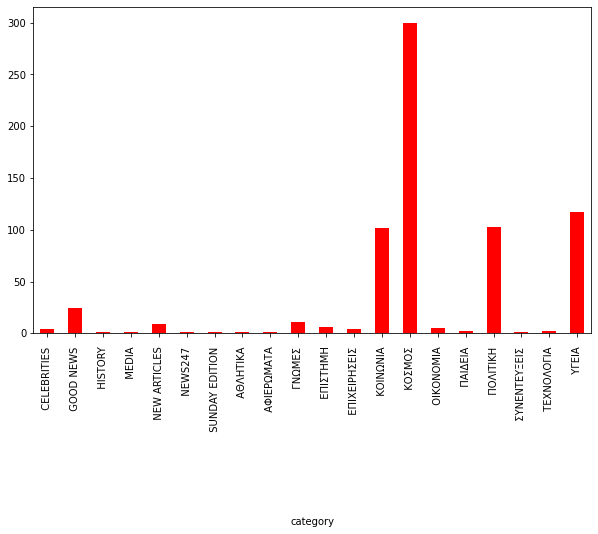

In [24]:
# Γράφημα για τις κατηγορίες
fig = plt.figure(figsize=(10,6))
vaccine_new2.groupby("category").body.count().plot.bar(color = 'red', ylim=0)
fig.show()

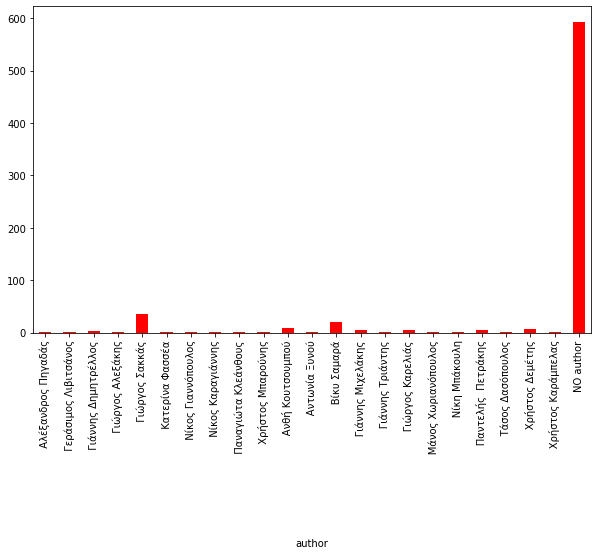

In [25]:
# Φτιάχνουμε ένα γράφημα για να δούμε ποιος έχει γράψει τα περισσότερα άρθρα σχετικά με τον covid

fig = plt.figure(figsize=(10,6))
vaccine_new.groupby("author").body.count().plot.bar(color= 'red', ylim=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


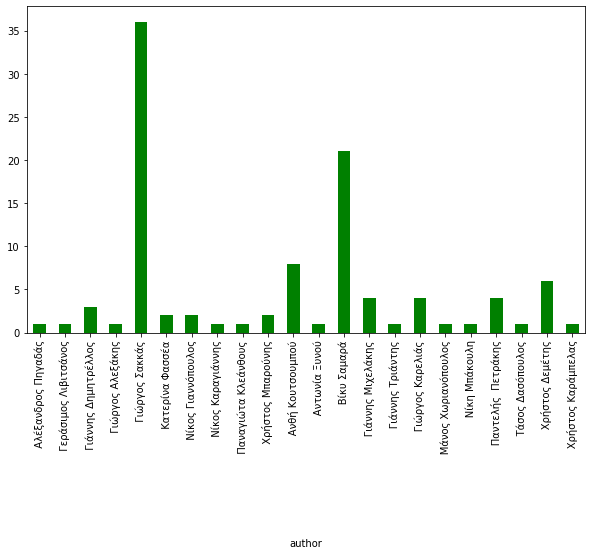

In [26]:
# Βγάζουμε την επιλογή Νο author για να έχουμε ένα καλύτερο γράφημα

vaccine_new2.drop(vaccine_new2.index[vaccine_new2['author'] == 'NO author'], inplace = True)
fig = plt.figure(figsize=(10,6))
vaccine_new2.groupby("author").category.count().plot.bar(color='green', ylim=0)
plt.show()

In [27]:
# Γραφήματα σχετικά με τα χαρακτηριστικά του κειμένου

#words count
vaccine_new['word_count'] = vaccine_new['body'].apply(lambda x: len(str(x).split(" "))) 

#number of characters. This also includes spaces
vaccine_new['char_count'] = vaccine_new['body'].str.len() 

#average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
vaccine_new['avg_word_length'] = vaccine_new['body'].apply(lambda x: avg_word(x)) 

#number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('greek')
vaccine_new['stopwords'] = vaccine_new['body'].apply(lambda x: len([x for x in x.split() if x in stop])) 

#number of numerics
vaccine_new['numerics'] = vaccine_new['body'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

#number of uppercase words
vaccine_new['upper'] = vaccine_new['body'].apply(lambda x: len([x for x in x.split() if x.isupper()])) 

In [28]:
#Basic feature extraction table of the original tweets

vaccine_new[['body', 'word_count', 'char_count', 'avg_word_length', 'stopwords', 'numerics', 'upper']]

,body,word_count,char_count,avg_word_length,stopwords,numerics,upper
0,Την οργισμένη αντίδραση της ΟΕΝΓΕ Ομοσπονδί...,741,4244,5.908938,163,14,7
1,Ο τελευταίος επιζών Δωδεκανήσιος Ιερολοχίτης...,332,1821,5.340502,80,8,4
2,Ένα ακόμα καμπανάκι κινδύνου χτυπούν οι επ...,241,1349,5.658163,61,4,0
3,Τα Κέντρα Ελέγχου και Πρόληψης Νοσημάτων CD...,325,1766,5.340741,77,8,6
4,Η ρυθμιστική υγειονομική αρχή της Βραζιλίας ...,127,687,5.666667,23,3,2
...,...,...,...,...,...,...,...
691,Το αντιιικό φάρμακο ρεμδεσιβίρη της αμερικαν...,305,1720,5.686747,66,6,3
692,Δήλωση απάντηση σε δημοσίευμα το οποίο όπω...,183,1083,6.300699,33,2,4
693,Μια εργαζόμενη σε νοσοκομείο που είχε λάβει ...,523,2950,5.672897,102,9,11
694,Το εμβόλιο CoronaVac κατά της πανδημίας COVI...,306,1683,5.624490,75,8,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ace014c90>,
      dtype=object)

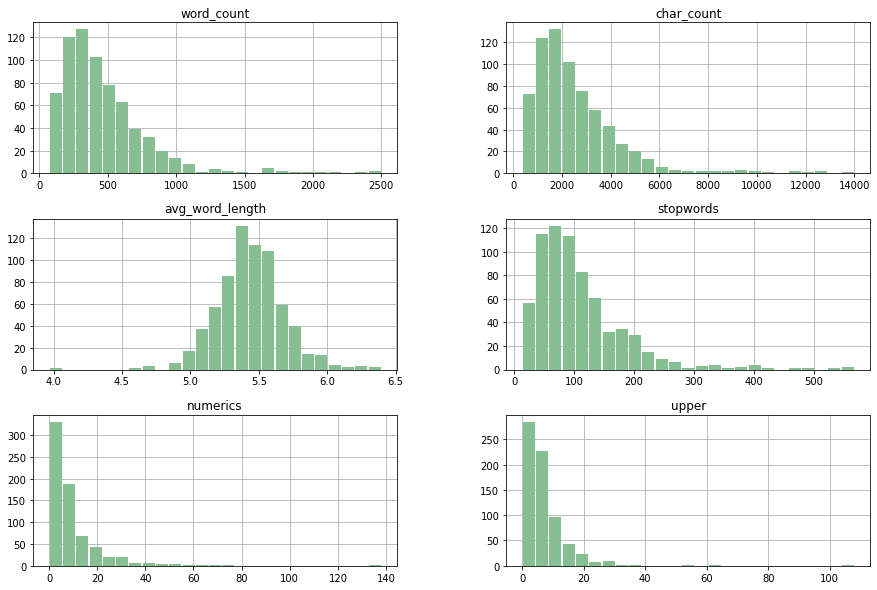

In [29]:
# Γραφήματα
n1 = vaccine_new[["word_count","char_count","avg_word_length","stopwords","numerics","upper"]]
n1.hist(figsize=(15,10), bins=25, color='#86bf91', zorder=2, rwidth=0.9)

In [30]:
#Καθαρίζω το κείμενο μου
clean_body = []
for body in vaccine_new['body']:
    body = re.sub("@[A-Za-z0-9]+","",body)
    body = re.sub(r'\d+', '', body)
    body = re.sub(r'\s+', ' ',body, flags=re.I)
    body = body.lower() 
    body = re.sub(r'\s+[a-zA-Z]\s+', ' ', body)
    body = re.sub(r'\W', ' ', body)    
     #Remove @ sign
    ##Here's where all the cleaning takes place
    clean_body.append(body)
vaccine_new['clean_body'] = clean_body


In [31]:
stop_list = ['όπως','gr','σύμφωνα','πρέπει','όλες','μπορεί','ενώ','οποία','σήμερα','δήλωσε','επίσης','πρώτοι',
             'ακολουθήστε','εκατομμύρια','ήδη','πρώτη','είχε','έχουμε','όμως','ηπα','ετών','υπάρχει','μέσα',
             'ώστε','εάν','αρχές','πρός','αναφέρει','περίπου','μεταξύ','όλα','ωστόσο','υπάρχουν','αλλες','μέσω',
             'καθώς','ακόμη','είπε','διαβάστε','google','μάθετε','άνω','άλλες','αφού','πάνω','έτσι','προς','βάση','μπε','εν','έτσι','κάνουν',
             'ανέφερε','τόνισε','οποίο','τέλος','αυτά','μπορούν','σχετικά','news',
             'πριν','μεγάλη','όσο','χθες','τόσο','ενός','δηλαδή','κάτι','ένας','ακόμα','λόγω',   
             'του', 'σας' 'της', 'λέω', 'και', 'για', 'την' ,'η','έχουν','να','ο', 
             'το', 'με', 'amp', 'στο', 'είχαν','είμαστε','στην','τη','των','τον','χωρίς',
             'από','τη', 'στον','τις','τα','σε','που','ότι','δεν',
             'στη','είναι','αυτή,','στις','οι','στα','τους','στις','στα','αυτό','μου','της',
             'σου', 'μόνο', 'μας', 'μια', 'πως', 'έχει', 'ήταν', 'χωρίς', 'στους', 'αλλά', 'όταν', 
             'ένα', 'εδώ', 'αυτή', 'γιατί', 'έναν', 'κάνει', 'ο', 'h', 'πιο', 'πώς', 'ως', 'o',
             'όπου', 'to', 'η', 'κάθε', 'ποιος', 'έως', 'in', 'ε', 'μία', 'λέω', 'εχω', 'α', 
             'λίγο', 'πολύ', 'πολλά', 'new', 'είδη', 'το', 'ή', 'ειδών', 'on', 'and', 'σας', 'μέχρι',
             'το', 'αύριο', 'όλους', 'τώρα', 'ώρα', 'vodafone', 'συμβαίνει', 'ευχαρισύμε', 'photo','ευρύτερη', 'γτκ', 'το μήνα',
             'aldama', 'δ', 'λες', 'έρχομαι', 'πόσο','δύο', 'ν', 'π', 'σ','μ', 'ποιός', 'κάνω', 'και', 'ετή', 'τρόπος', 'λένε', 'τ', 'απο', 'ρε', 'οτι', 'ειναι',
             'λέω', 'κ', '_']

In [32]:
#Ενώνω τις λίστες μου
stop.extend(stop_list)

In [33]:
#Βγάζω τα stopwrods από το κείμενο μου
vaccine_new['clean_body'] = vaccine_new['clean_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [34]:
#Φτίαχνω το κείμενο μου για να έχω ένα καλύτερο αποτέλεσμα στο worldcloud
text = vaccine_new['clean_body'].str.cat(sep = ' ').replace('εμβόλια','εμβόλιο')
text = text.replace('εμβολιαστεί', 'εμβολιαστώ')
text = text.replace('εμβολιαστούν', 'εμβολιαστώ')
text = text.replace('κόσμο', 'κόσμος')
text = text.replace('αυτές', '')
text = text.replace('κυρίως', '')
text = text.replace('όσους', '')

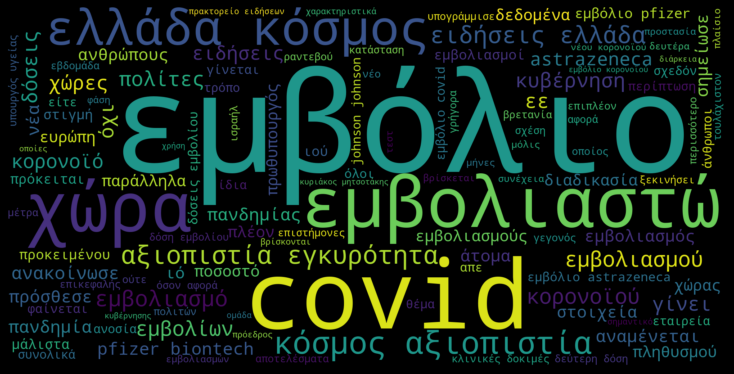

In [35]:
wordcloud = WordCloud(
    stopwords = stop,
    width = 2000,
    height = 1000,
    max_words=120,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (30, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [36]:
#Φτιάχνουμe ένα νέο dataframe για να βρούμε τις πιο συχνές λέξεις και να το επεξεργαστούμε όπως θέλουμε 
commonwords = vaccine_new['clean_body']
commonwords = pd. DataFrame(commonwords)
commonwords['clean_body'] = commonwords['clean_body'].str.replace('εμβολίου','εμβόλιο')
commonwords['clean_body'] = commonwords['clean_body'].str.replace('κορονοϊού','κορονοϊός')
commonwords['clean_body'] = commonwords['clean_body'].str.replace('εμβολιασμό','εμβολιασμός')
commonwords['clean_body'] = commonwords['clean_body'].str.replace('εμβολιασμόςς','εμβολιασμός')
commonwords['clean_body'] = commonwords['clean_body'].str.replace('εμβολιασμού','εμβολιασμός') 
commonwords['clean_body'] = commonwords['clean_body'].str.replace('εμβολίων','εμβόλια')  

In [37]:
#Οι 20 πιο συχνές λέξεις στο κείμενο
commonwords['temp_list'] = commonwords['clean_body'].apply(lambda x:str(x).split())
top = Counter([item for sublist in commonwords['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,εμβόλιο,2012
1,εμβόλια,1339
2,εμβολιασμός,922
3,covid,675
4,υγείας,654
5,ειδήσεις,581
6,δόσεις,575
7,κορονοϊός,547
8,ελλάδα,487
9,κόσμο,467


In [38]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words', width=600, height = 600)
fig.show()

**Vectorization **

In [39]:
#Διανυσματοποίηση
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [40]:
cv = CountVectorizer( stop_words= stop, max_features=20, ngram_range=(2, 2) ) 
count_vector = cv.fit_transform(vaccine_new['clean_body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['δι', 'μήνα', 'ἀλλ'] not in stop_words.



In [41]:
#Φτιάχνω ενα dataframe τα αποτελέσματα μου για να κάνω ένα καλό γράφημα
a=results.sum(axis =0).sort_values(ascending = False)
a=pd.DataFrame(a, columns=['number'])
a.reset_index(level=0, inplace=True)
a

,index,number
0,ελλάδα κόσμο,325
1,αξιοπιστία εγκυρότητα,325
2,κόσμο αξιοπιστία,325
3,ειδήσεις ελλάδα,289
4,pfizer biontech,153
5,δόσεις εμβολίου,108
6,εμβόλιο astrazeneca,103
7,johnson johnson,100
8,κλινικές δοκιμές,95
9,δόση εμβολίου,95


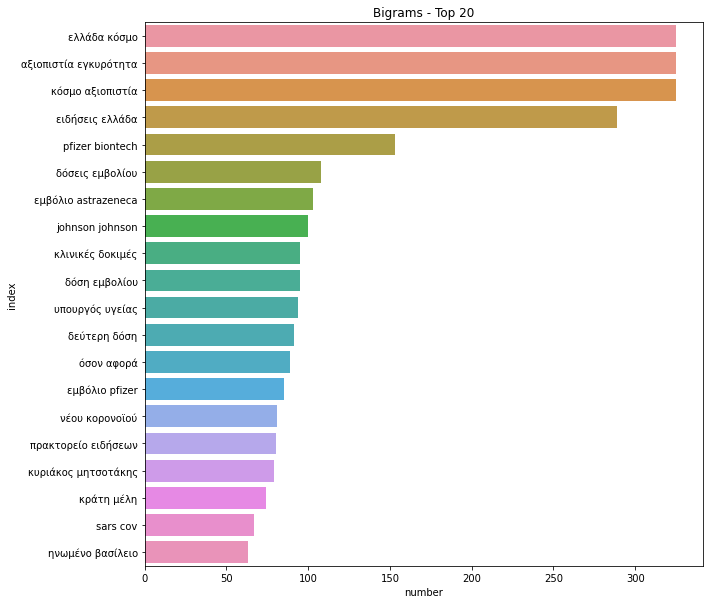

In [42]:
#Γράφημα top 20 ζευγάρια λέξεων
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = sns.barplot(x='number', y='index', orient='h', data=a, ax=ax)
plt.title('Bigrams - Top 20')
plt.show();

In [43]:
#Φτιάχνουμε ένα dataset που περιέχει μόνο την κατηγορία ΥΓΕΙΑ από την οποία θα βρούμε τα 20 με την μεγαλύτερη ομοιότητα κειμένου
ugeia = vaccine_new[vaccine_new['category'].str.contains("ΥΓΕΙΑ")]

In [44]:
tfidf_vectorizer = TfidfVectorizer(stop_words= stop, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(ugeia['clean_body'])  #finds the tfidf score with normalization

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['δι', 'μήνα', 'ἀλλ'] not in stop_words.



In [45]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,astrazeneca,biontech,cdc,cov,covax,covid,facebook,fda,gbs,johnson,lse,moderna,mrna,pfizer,rna,sars,sputnik,times,xa,xanews,xaαπό,xaειδήσεις,άδεια,άλλα,άλλη,άλλο,άλλους,άλλων,άμεσα,άνθρωποι,άτομα,άτομο,έγιναν,έγινε,έγκριση,έγκυες,έλεγχο,έλληνες,έναντι,έναρξη,...,τύπου,υγεία,υγείας,υγειονομικούς,υγειονομικών,υπογράμμισε,υπουργείο,υπουργείου,υπουργός,υπό,υψηλή,φάση,φάσης,φαίνεται,φαρμάκων,φαρμακευτικές,φορά,φροντίδας,φυσικά,φυσική,χαρακτηριστικά,χιλιάδες,χορήγηση,χορηγηθεί,χρήση,χρειάζεται,χρειαστεί,χρόνια,χρόνο,χώρα,χώρας,χώρες,όλο,όλοι,όλων,όρο,όσοι,όσον,όσους,όχι
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151722,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.084012,0.109590,0.370607,0.318380,0.000000,0.000000,0.000000,0.075861,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.291100
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.151855,0.170834,0.151855,0.000000,0.000000,0.000000,0.000000,0.158619,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.151855,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.170834,0.0,0.143151,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.037337,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.07423,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.176952,0.0,0.0,...,0.0,0.000000,0.186685,0.000000,0.081353,0.171735,0.176952,0.085867,0.232610,0.077537,0.0,0.0,0.0,0.0,0.074230,0.0,0.0,0.00000,0.0,0.0,0.000000,0.075828,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.106948,0.0,0.053474,0.071314,0.222691,0.0,0.0,0.000000,0.0,0.069976,0.059506
3,0.000000,0.0,0.0,0.0,0.0,0.036110,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071791,0.080763,0.071791,0.153525,0.065279,0.074988,0.000000,0.000000,0.080763,0.0,0.00000,0.103433,0.0,0.0,0.0,0.078679,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.036110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071791,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.065279,0.0,0.0,0.0,0.06897,0.000000,0.0,0.000000,0.137940,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.062621,0.0,0.0,0.0,0.0,0.085253,0.0,0.0,0.0,0.319556,0.0,0.06344,0.0,0.109791,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.042627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.084747,0.0,0.0,0.07706,0.0,0.0,0.000000,0.173142,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  

cosine scores ==>  [[1.         0.0965448  0.2566089  ... 0.13725921 0.07040738 0.08208108]
 [0.0965448  1.         0.05072061 ... 0.02509863 0.089503   0.10198871]
 [0.2566089  0.05072061 1.         ... 0.229707   0.06134014 0.1718043 ]
 ...
 [0.13725921 0.02509863 0.229707   ... 1.         0.03416172 0.09923004]
 [0.07040738 0.089503   0.06134014 ... 0.03416172 1.         0.03872197]
 [0.08208108 0.10198871 0.1718043  ... 0.09923004 0.03872197 1.        ]]


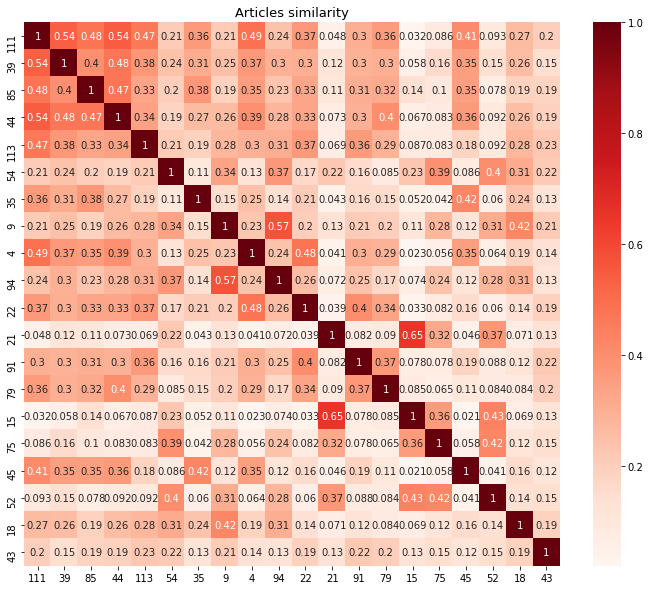

In [47]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

# Φτιάχνουμε DataFrame με το αποτέλεσμα του cosine_similarity
plt_df = pd.DataFrame(arr)

scores = []
for index, row in plt_df.iterrows():
  scores.append({ 'i' : index, 'similarity_score': row.sort_values(ascending = False).head(20).sum()})

scores = pd.DataFrame(scores)
# Παίρνω τα 20 με το μεγαλύτερο score
top20scores = scores.sort_values('similarity_score', ascending=False).head(20)

# Παίρνω τα άρθρα που το index τους είναι μέσα στο top20scores
top20similar =  plt_df.loc[list(top20scores['i'])][list(top20scores.head(20)['i'])]

# Plot με τα 20 κορυφαία σε ομοιότητα άρθρα
plt.figure(figsize=(12,10))
sns.heatmap(top20similar, annot=True, cmap=plt.cm.Reds)
plt.title('Articles similarity', fontsize=13)
plt.show()

In [48]:
#Ανάλυση συναισθήματος

In [49]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

vaccine_new['sentiment'] = vaccine_new['body'].apply(sentiment_calc)

In [50]:
sentiment= vaccine_new [['date', 'body',	'category','year', 'month',	'day',	'clean_body']]

In [51]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [53]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= stop,
                      ngram_range=(1, 2))

In [54]:
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό
matrix = vec.fit_transform(sentiment['body'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αι', 'ακολουθηστε', 'ακομα', 'ακομη', 'αλλ', 'αλλος', 'αλλοσ', 'αμα', 'αναφερει', 'ανεφερε', 'ανω', 'απ', 'αρα', 'αρχες', 'αυ', 'αυριο', 'αυτος', 'αφ', 'αφου', 'βαση', 'γαρ', 'γιατι', 'γουν', 'δαι', 'δαις', 'δαισ', 'δη', 'δηλαδη', 'δηλωσε', 'δι', 'δια', 'διαβαστε', 'δυο', 'εαυτου', 'εγω', 'εδω', 'ει', 'ειδη', 'ειδων', 'ειμι', 'ειπε', 'εις', 'εισ', 'ειτε', 'ειχαν', 'ειχε', 'εκ', 'εκατομμυρια', 'εμος', 'εμοσ', 'ενα', 'εναν', 'ενας', 'ενος', 'εξ', 'επει', 'επισης', 'ερχομαι', 'εστι', 'ετη', 'ετι', 'ετσι', 'ετων', 'ευρυτερη', 'ευχαρισυμε', 'εφ', 'εχει', 'εχουμε', 'εχουν', 'εως', 'ηδη', 'ης', 'ηταν', 'ινα', 'καθε', 'καθως', 'καιτοι', 'καν', 'κανει', 'κανουν', 'κανω', 'κατι', 'λενε', 'λεω', 'λιγο', 'λογω', 'μαθετε', 'μεγαλη', 'μεν', 'μεσα', 'μεσω', 'μεταξυ', 'μεχρι', 'μηνα', 'μητε', 'μονο', 'μπορ

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
wordcount_df.shape

(696, 13161)

In [56]:
# Φτιάxνω μια λίστα με angry words
angry_words = emolex_df[emolex_df.Anger == 1]['word']
sentiment['anger'] = wordcount_df[angry_words].sum(axis=1)

# Φτιάxνω μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sentiment['positivity'] = wordcount_df[positive_words].sum(axis=1)

# Φτιάxνω μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
sentiment['sadness'] = wordcount_df[sadness_words].sum(axis=1)

# Φτιάxνω μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
sentiment['surprise'] = wordcount_df[surprise_words].sum(axis=1)

# Φτιάxνω μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
sentiment['disgust'] = wordcount_df[disgust_words].sum(axis=1)

# Φτιάxνω μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
sentiment['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

# Φτιάxνω μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']
sentiment['negative'] = wordcount_df[negative_words].sum(axis=1)

# Φτιάxνω μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sentiment['joy'] = wordcount_df[joy_words].sum(axis=1)

# Φτιάxνω μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']
sentiment['trust'] = wordcount_df[trust_words].sum(axis=1)

# Φτιάxνω μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']
sentiment['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [57]:
sentiment.set_index('date' , inplace=True)

In [58]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

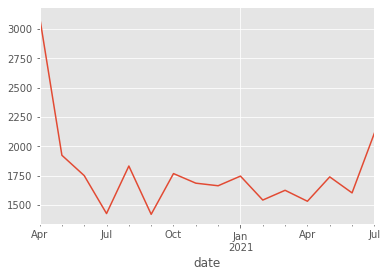

In [59]:
sentiment['clean_body'].str.len().resample('M').mean().plot() 

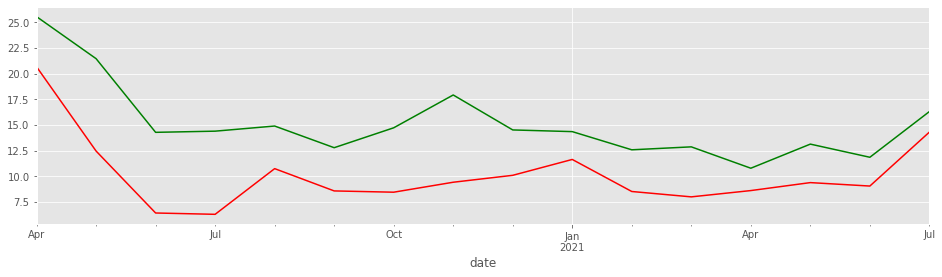

In [60]:
#Τα συναισθήματα positivity,negative ανα μήνα πως διαμορφώθηκαν
ax = sentiment['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
sentiment['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')


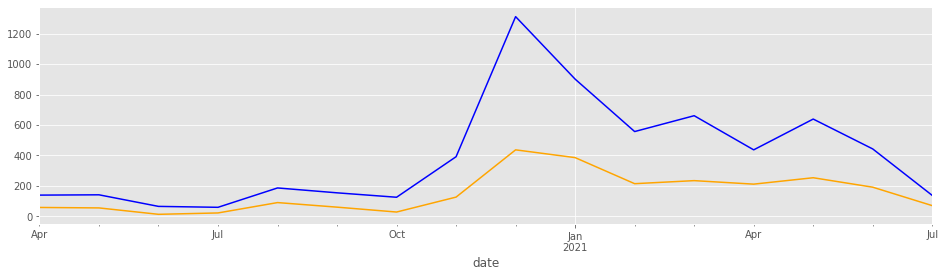

In [61]:
#trust-angry ανα μήνα πως διαμορφώθηκαν
ax = sentiment['anger'].resample('M').sum().plot(figsize=(16,4), color = 'orange')
sentiment['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [62]:
#Συνολικά τα συναισθήματα που βγάζουν τα κείμενα
sentiment2 = sentiment[['anger',	'positivity',	'joy',	'disgust',	'surprise',	'trust',	'anticipation',	'sadness',	'negative',	'fear']]

In [63]:
for sent in sentiment2:
  x = sentiment[sent].sum()
  print(x)

2462
9680
1664
2835
1541
6355
3580
2117
6756
3545


In [64]:
import plotly.graph_objects as go

labels = ['anger',	'positivity',	'joy',	'disgust',	'surprise',	'trust',	'anticipation',	'sadness',	'negative',	'fear']
values = [2462, 9680, 1664, 2835, 1541, 6355, 3580, 2117, 6756, 3545]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()